In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np    
import plotly           
import plotly.express as px
import plotly.io as pio
import glob
import statsmodels.api as sm  
import statsmodels.formula.api as smf
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.stats.weightstats
import statsmodels.stats.nonparametric
import warnings
import pingouin as pg
warnings.filterwarnings("once")

In [2]:
df = pd.read_excel("finance.xlsx")

C:\Users\Christian\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedCheckFailedWarning: Failed to check for latest version of package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1d4e5b3cdc0>


<AxesSubplot:>

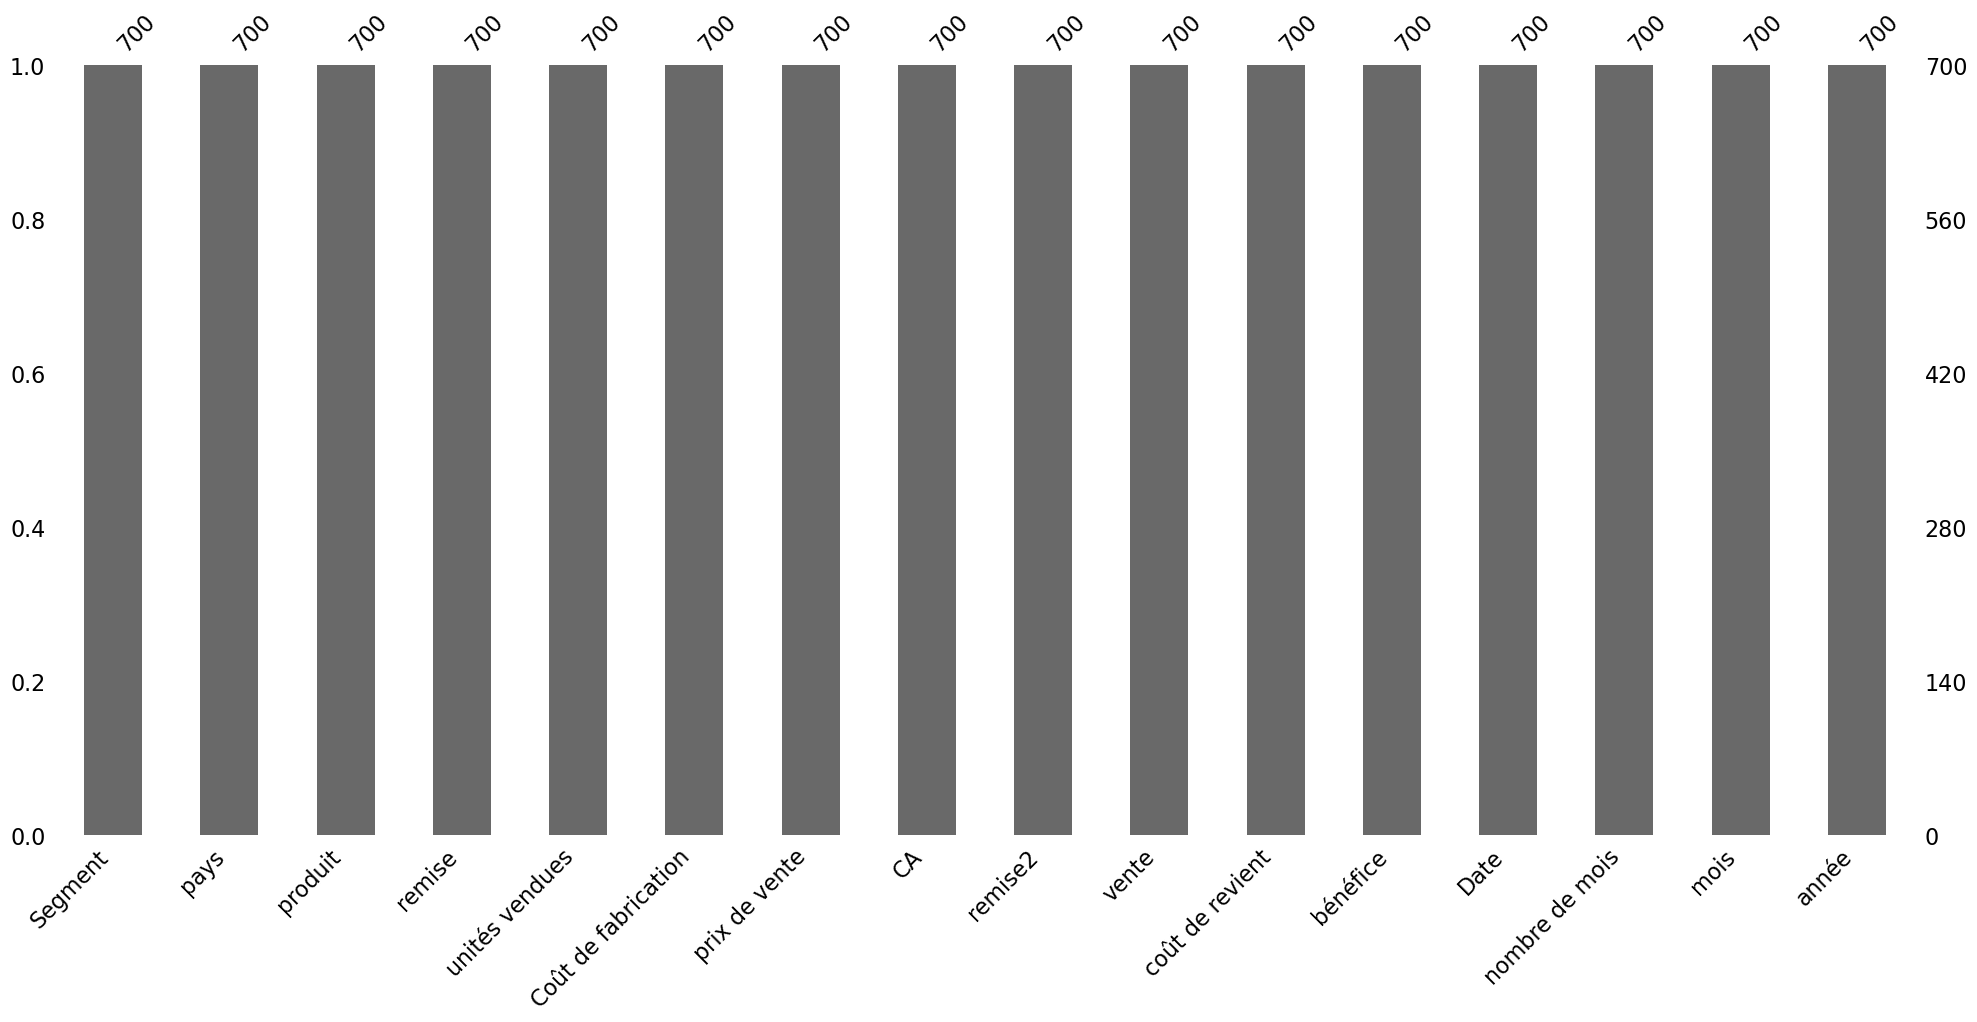

In [3]:
msno.bar(df)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   pays                 700 non-null    object        
 2   produit              700 non-null    object        
 3   remise               700 non-null    object        
 4   unités vendues       700 non-null    float64       
 5   Coût de fabrication  700 non-null    int64         
 6   prix de vente        700 non-null    int64         
 7   CA                   700 non-null    float64       
 8   remise2              700 non-null    float64       
 9   vente                700 non-null    float64       
 10  coût de revient      700 non-null    float64       
 11  bénéfice             700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  nombre de mois       700 non-null  

In [5]:
df.head()

Segment     pays    produit remise  unités vendues  Coût de fabrication  \
0  Government   Canada  Carretera   None          1618.5                    3   
1  Government  Germany  Carretera   None          1321.0                    3   
2   Midmarket   France  Carretera   None          2178.0                    3   
3   Midmarket  Germany  Carretera   None           888.0                    3   
4   Midmarket   Mexico  Carretera   None          2470.0                    3   

   prix de vente       CA  remise2    vente  coût de revient  bénéfice  \
0             20  32370.0      0.0  32370.0          16185.0   16185.0   
1             20  26420.0      0.0  26420.0          13210.0   13210.0   
2             15  32670.0      0.0  32670.0          21780.0   10890.0   
3             15  13320.0      0.0  13320.0           8880.0    4440.0   
4             15  37050.0      0.0  37050.0          24700.0   12350.0   

        Date  nombre de mois     mois  année  
0 2014-01-01               1  January   2014  
1 2014-01-01               1  January   2014  
2 2014-06-01               6     June   2014  
3 2014-06-01               6     June   2014  
4 2014-06-01               6     June   2014

In [6]:
df.columns

Index(['Segment', 'pays', 'produit', 'remise', 'unités vendues',
       'Coût de fabrication', 'prix de vente', 'CA', 'remise2', 'vente',
       'coût de revient', 'bénéfice', 'Date', 'nombre de mois', 'mois',
       'année'],
      dtype='object')

In [7]:
df['année'] = df['année'].astype(int).astype(str)
#df[['points', 'assists']] = df[['points', 'assists']].astype(str).astype(int)

In [8]:
df.describe()

unités vendues  Coût de fabrication  prix de vente            CA  \
count      700.000000           700.000000     700.000000  7.000000e+02   
mean      1608.294286            96.477143     118.428571  1.827594e+05   
std        867.427859           108.602612     136.775515  2.542623e+05   
min        200.000000             3.000000       7.000000  1.799000e+03   
25%        905.000000             5.000000      12.000000  1.739175e+04   
50%       1542.500000            10.000000      20.000000  3.798000e+04   
75%       2229.125000           250.000000     300.000000  2.790250e+05   
max       4492.500000           260.000000     350.000000  1.207500e+06   

             remise2         vente  coût de revient       bénéfice  \
count     700.000000  7.000000e+02       700.000000     700.000000   
mean    13150.354629  1.696091e+05    145475.211429   24133.860371   
std     22962.928775  2.367263e+05    203865.506118   42760.626563   
min         0.000000  1.655080e+03       918.000000  -40617.500000   
25%       800.320000  1.592800e+04      7490.000000    2805.960000   
50%      2585.250000  3.554020e+04     22506.250000    9242.200000   
75%     15956.343750  2.610775e+05    245607.500000   22662.000000   
max    149677.500000  1.159200e+06    950625.000000  262200.000000   

       nombre de mois  
count      700.000000  
mean         7.900000  
std          3.377321  
min          1.000000  
25%          5.750000  
50%          9.000000  
75%         10.250000  
max         12.000000

In [9]:
#print("Répartition des thèses en foncion de leur statut")
#df['produit'].hist()
#plt.show()
#print("")

In [10]:
# Filtre sur l'année 2014
df_2014=df[df["année"]== "2014"]
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              525 non-null    object        
 1   pays                 525 non-null    object        
 2   produit              525 non-null    object        
 3   remise               525 non-null    object        
 4   unités vendues       525 non-null    float64       
 5   Coût de fabrication  525 non-null    int64         
 6   prix de vente        525 non-null    int64         
 7   CA                   525 non-null    float64       
 8   remise2              525 non-null    float64       
 9   vente                525 non-null    float64       
 10  coût de revient      525 non-null    float64       
 11  bénéfice             525 non-null    float64       
 12  Date                 525 non-null    datetime64[ns]
 13  nombre de mois       525 non-null  

In [11]:
df["Segment"].unique()

array(['Government', 'Midmarket', 'Channel Partners', 'Enterprise',
       'Small Business'], dtype=object)

In [12]:
df["produit"].unique()

array(['Carretera', 'Montana', 'Paseo', 'Velo', 'VTT', 'Amarilla'],
      dtype=object)

In [13]:
df["pays"].unique()

array(['Canada', 'Germany', 'France', 'Mexico',
       'United States of America'], dtype=object)

In [14]:
df['remise'].unique()

array(['None', 'Low', 'Medium', 'High'], dtype=object)

In [15]:
df_remise = df_2014.groupby(['pays','Segment','remise']).size().reset_index(name='nb_remise')
df_remise

pays           Segment  remise  nb_remise
0                     Canada  Channel Partners    High          4
1                     Canada  Channel Partners     Low          3
2                     Canada  Channel Partners  Medium          6
3                     Canada  Channel Partners    None          2
4                     Canada        Enterprise    High          4
..                       ...               ...     ...        ...
89  United States of America         Midmarket  Medium          6
90  United States of America         Midmarket    None          2
91  United States of America    Small Business    High          6
92  United States of America    Small Business     Low          4
93  United States of America    Small Business  Medium          5

[94 rows x 4 columns]

In [16]:
df_remise_graph = px.bar(
    data_frame=df_remise,
    x="remise",
    y="nb_remise",
    color="Segment",               
    opacity=0.9,                  
    orientation="v",              
    barmode='group',
    hover_name = 'pays')  
df_remise_graph

C:\Users\Christian\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [17]:
#from packaging import version

In [18]:
df_fabrication = df_2014.groupby(["pays","produit"])["Coût de fabrication"].mean().astype(float).astype(int)
df_fabrication = df_fabrication.reset_index()
df_fabrication.sort_values(by='Coût de fabrication',ascending=True, inplace=True)
df_fabrication

pays    produit  Coût de fabrication
1                     Canada  Carretera                    3
19                    Mexico  Carretera                    3
13                   Germany  Carretera                    3
7                     France  Carretera                    3
25  United States of America  Carretera                    3
14                   Germany    Montana                    5
20                    Mexico    Montana                    5
8                     France    Montana                    5
2                     Canada    Montana                    5
26  United States of America    Montana                    5
15                   Germany      Paseo                   10
9                     France      Paseo                   10
21                    Mexico      Paseo                   10
27  United States of America      Paseo                   10
3                     Canada      Paseo                   10
23                    Mexico       Velo                  120
17                   Germany       Velo                  120
29  United States of America       Velo                  120
11                    France       Velo                  120
5                     Canada       Velo                  120
28  United States of America        VTT                  250
22                    Mexico        VTT                  250
10                    France        VTT                  250
4                     Canada        VTT                  250
16                   Germany        VTT                  250
18                    Mexico   Amarilla                  260
12                   Germany   Amarilla                  260
24  United States of America   Amarilla                  260
6                     France   Amarilla                  260
0                     Canada   Amarilla                  260

In [19]:
df_unit_vendu = df_2014.groupby("produit")["unités vendues"].mean().astype(float).astype(int)
df_unit_vendu  = df_unit_vendu.reset_index()
#df_unit_vendu.sort_values(by="unités vendues",ascending=True, inplace=True)
df_unit_vendu

produit  unités vendues
0   Amarilla            1713
1  Carretera            1649
2    Montana            1684
3      Paseo            1695
4        VTT            1570
5       Velo            1499

In [20]:
df_unit_vendu_std = df_2014.groupby("produit")["unités vendues"].std().astype(float).astype(int)
df_unit_vendu_std

produit
Amarilla     879
Carretera    836
Montana      795
Paseo        923
VTT          867
Velo         925
Name: unités vendues, dtype: int32

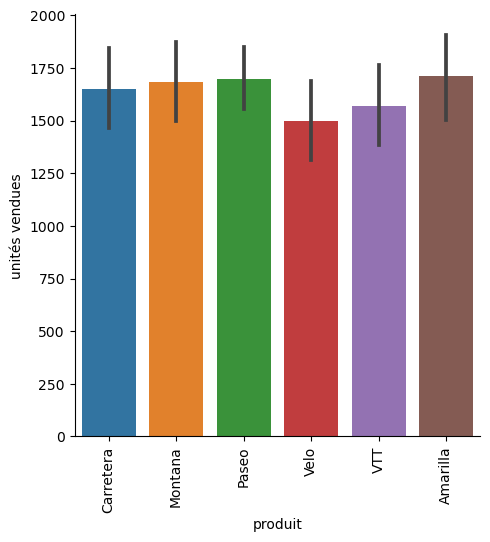

In [21]:
sns.catplot(x="produit", y= "unités vendues", data=df_2014, kind="bar")
plt.xticks(rotation='vertical')
plt.show()

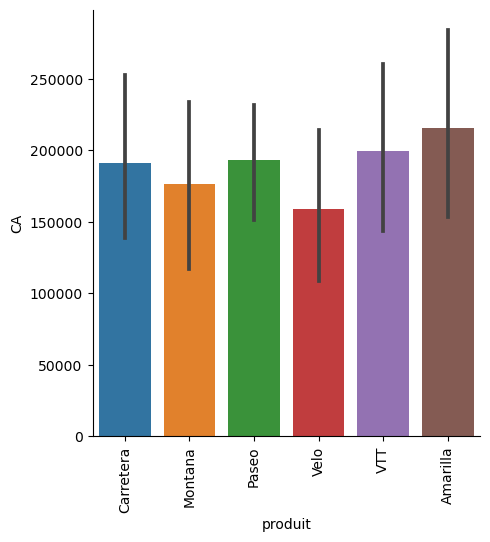

In [22]:
sns.catplot(x="produit", y= "CA", data=df_2014, kind="bar")
plt.xticks(rotation='vertical')
plt.show()

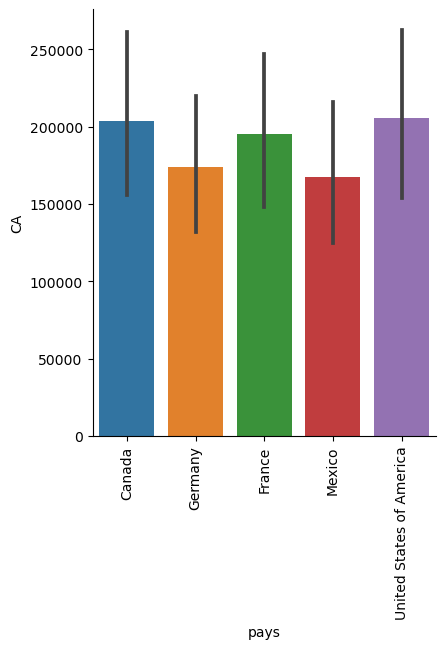

In [23]:
sns.catplot(x="pays", y= "CA", data=df_2014, kind="bar")
plt.xticks(rotation='vertical')
plt.show()

In [24]:
df_ca_std = df_2014.groupby("produit")["CA"].std().astype(float).astype(int)
df_ca_std

produit
Amarilla     273654
Carretera    240021
Montana      254449
Paseo        267021
VTT          270863
Velo         243465
Name: CA, dtype: int32

In [25]:
#df_corrélation = df.loc[:,['CA','coût des marchaindises vendues', 'bénéfice', 'remise2']]

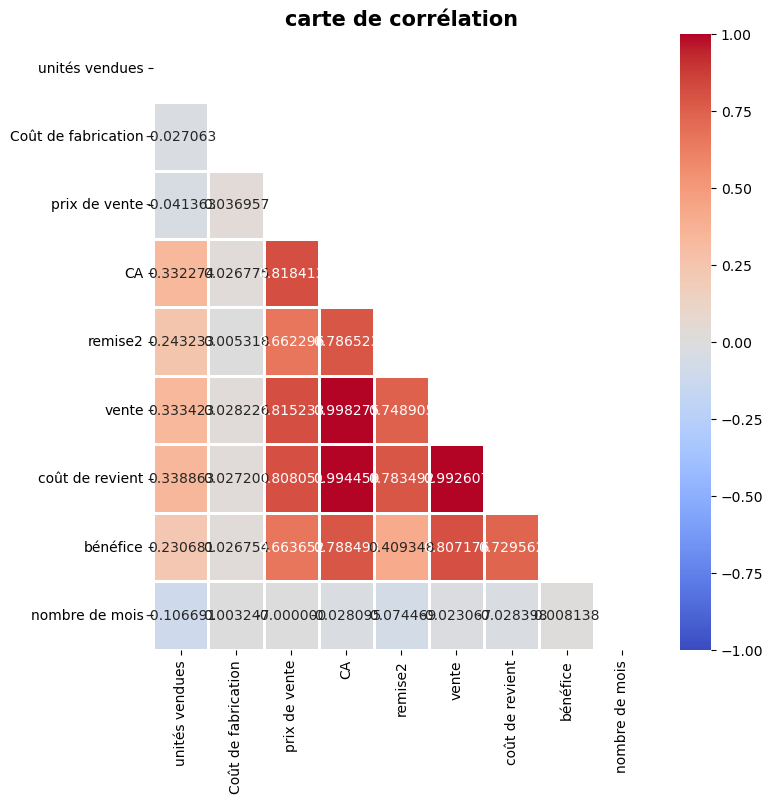

In [26]:
# Créer une matrice de corrélation 
plt.figure(figsize=(8,8))
mask = np.triu(np.ones_like(df_2014.corr(), dtype = bool))
sns.heatmap(df_2014.corr(), mask=mask, center =0, linewidths=1,  annot=True, cmap='coolwarm', fmt="2f", vmin=-1, vmax=1)
plt.title('carte de corrélation', fontsize =15, fontweight='bold')
plt.show()

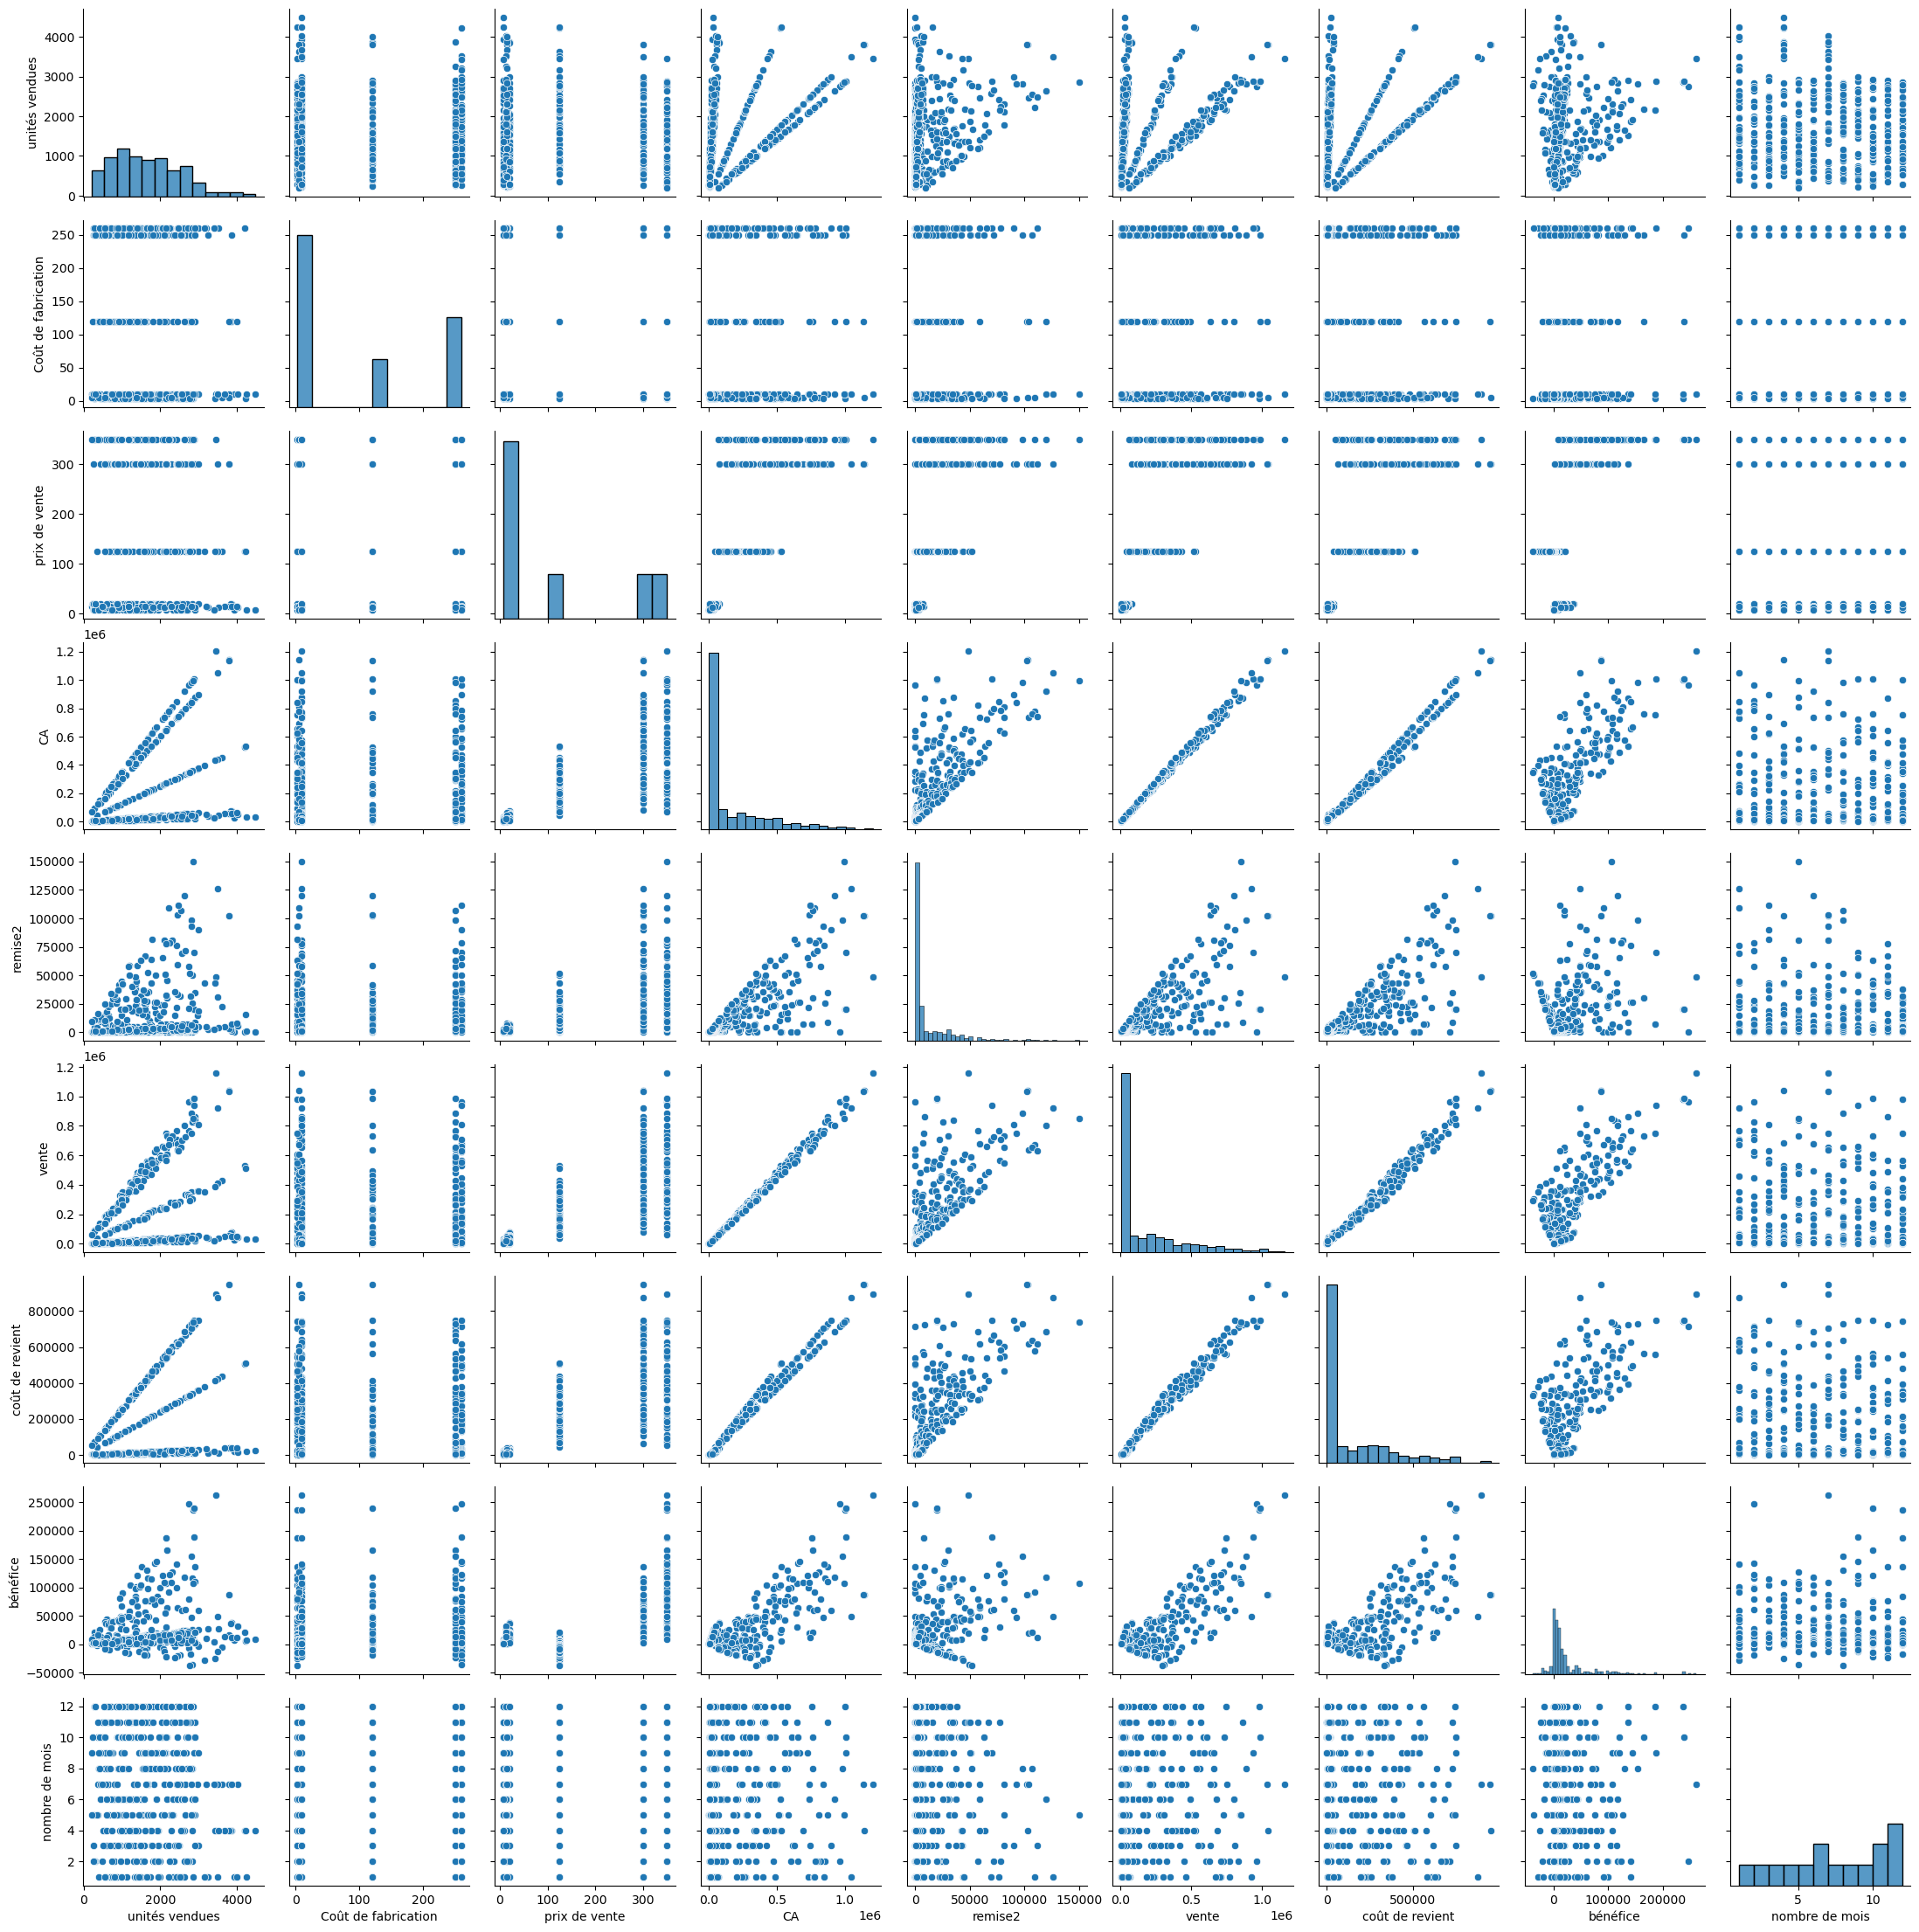

In [27]:
sns.pairplot(df_2014)

In [28]:
px.scatter(df_2014, x="unités vendues", y="coût de revient", color='produit', facet_col="produit", trendline="ols",trendline_scope ="overall", hover_data =["produit"])

C:\Users\Christian\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [29]:
fig_box = px.box(df_2014, 
                 x="produit", 
                 y="CA", 
                 points="all",
                 color = "produit",
                 hover_data =["produit"],
                 boxmode ='overlay',
                 log_y = True,
                 hover_name="pays",
                 width=1000, height=600,
                 labels={
                     "CA": "chiffre d'affaires",
                     "produit": "Répartition par produit"},
                 color_discrete_map={})
fig_box.show()

C:\Users\Christian\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [30]:
df_cout = df_2014.loc[:,['pays','produit','unités vendues','Coût de fabrication','coût de revient',"bénéfice","prix de vente","remise2","CA"]]
df_cout["ch_affaires"] = df_cout["CA"]+df_cout["remise2"]
df_cout["coût fixe"] = df_cout["unités vendues"]*df_cout["Coût de fabrication"]
df_cout["coût variable"] = df_cout["coût de revient"] - df_cout["coût fixe"]
df_cout

pays    produit  unités vendues  Coût de fabrication  \
0                      Canada  Carretera          1618.5                    3   
1                     Germany  Carretera          1321.0                    3   
2                      France  Carretera          2178.0                    3   
3                     Germany  Carretera           888.0                    3   
4                      Mexico  Carretera          2470.0                    3   
..                        ...        ...             ...                  ...   
695                    France   Amarilla          2475.0                  260   
696                    Mexico   Amarilla           546.0                  260   
697                    Mexico    Montana          1368.0                    5   
698                    Canada      Paseo           723.0                   10   
699  United States of America        VTT          1806.0                  250   

     coût de revient  bénéfice  prix de vente    remise2        CA  \
0            16185.0  16185.00             20       0.00   32370.0   
1            13210.0  13210.00             20       0.00   26420.0   
2            21780.0  10890.00             15       0.00   32670.0   
3             8880.0   4440.00             15       0.00   13320.0   
4            24700.0  12350.00             15       0.00   37050.0   
..               ...       ...            ...        ...       ...   
695         618750.0  12375.00            300  111375.00  742500.0   
696         136500.0   2730.00            300   24570.00  163800.0   
697           6840.0   1299.60              7    1436.40    9576.0   
698           3615.0    686.85              7     759.15    5061.0   
699           5418.0  13003.20             12    3250.80   21672.0   

     ch_affaires  coût fixe  coût variable  
0       32370.00     4855.5        11329.5  
1       26420.00     3963.0         9247.0  
2       32670.00     6534.0        15246.0  
3       13320.00     2664.0         6216.0  
4       37050.00     7410.0        17290.0  
..           ...        ...            ...  
695    853875.00   643500.0       -24750.0  
696    188370.00   141960.0        -5460.0  
697     11012.40     6840.0            0.0  
698      5820.15     7230.0        -3615.0  
699     24922.80   451500.0      -446082.0  

[525 rows x 12 columns]

In [31]:
fig = px.scatter(df_cout, x="coût fixe", y="coût variable", symbol="produit", color="produit", size = 'unités vendues', trendline="ols", trendline_scope ="overall", hover_data =["pays"])
fig.add_hrect(y0=1160000, y1=2600000, line_width=3, line_dash="dash", fillcolor="red", opacity=0.2)
fig.show()

C:\Users\Christian\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [32]:
df_cout["ch_affaires"].sum()

106430528.25

In [33]:
#df_map = df.loc[:,['pays','mois','bénéfice']]
#df_heatmap = df_map.groupby(['pays','mois'])['bénéfice'].sum().astype(float).astype(int)
#df_heatmap  = df_heatmap.reset_index()
#df_heatmap
#df_heatmap.set_index('pays')

In [34]:
#heat = df_heatmap.pivot(index='pays', columns='mois', values='bénéfice')

In [35]:
#fig_heatmap=px.imshow(df_heatmap)
#fig_heatmap.update_traces(colorbar_orientation='h', selector=dict(type='heatmap'))
#fig_heatmap

In [36]:
df['remise2'].sum()

9205248.24

In [37]:
#fd_test["nb_produit"].sum()

In [38]:
#par_pays = df.loc[:,["produit"]].value_counts()
#par_pays

In [39]:
df_produit = df_2014.groupby(["pays","mois","produit"])["unités vendues"].sum()
df_total_produit = df_2014.groupby("mois")["unités vendues"].sum()
df_produit_pourcentage = df_produit/df_total_produit
df_produit_pourcentage = df_produit_pourcentage.reset_index()
df_produit_pourcentage 

pays       mois    produit  unités vendues
0                      Canada      April   Amarilla        0.044627
1                      Canada      April  Carretera        0.009412
2                      Canada      April    Montana        0.048202
3                      Canada      April      Paseo        0.029625
4                      Canada      April        VTT        0.011960
..                        ...        ...        ...             ...
349  United States of America  September  Carretera        0.033991
350  United States of America  September    Montana        0.040642
351  United States of America  September      Paseo        0.049284
352  United States of America  September        VTT        0.032594
353  United States of America  September       Velo        0.027863

[354 rows x 4 columns]

In [40]:
df_produit_pourcentage = df_produit_pourcentage.reset_index()
df_produit_pourcentage

index                      pays       mois    produit  unités vendues
0        0                    Canada      April   Amarilla        0.044627
1        1                    Canada      April  Carretera        0.009412
2        2                    Canada      April    Montana        0.048202
3        3                    Canada      April      Paseo        0.029625
4        4                    Canada      April        VTT        0.011960
..     ...                       ...        ...        ...             ...
349    349  United States of America  September  Carretera        0.033991
350    350  United States of America  September    Montana        0.040642
351    351  United States of America  September      Paseo        0.049284
352    352  United States of America  September        VTT        0.032594
353    353  United States of America  September       Velo        0.027863

[354 rows x 5 columns]

In [41]:
df_produit_pourcentage_graph = px.bar(df_produit_pourcentage, x='mois', y='unités vendues', color='pays',orientation='v',facet_col="produit",facet_col_wrap = 2,
                         category_orders={"mois": ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]})
df_produit_pourcentage_graph.show()

C:\Users\Christian\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [42]:
df_produit = df_2014.groupby(["pays","mois","produit"])["unités vendues"].sum()
df_produit = df_produit.reset_index()
df_produit

pays       mois    produit  unités vendues
0                      Canada      April   Amarilla          3520.5
1                      Canada      April  Carretera           742.5
2                      Canada      April    Montana          3802.5
3                      Canada      April      Paseo          2337.0
4                      Canada      April        VTT           943.5
..                        ...        ...        ...             ...
349  United States of America  September  Carretera          1947.0
350  United States of America  September    Montana          2328.0
351  United States of America  September      Paseo          2823.0
352  United States of America  September        VTT          1867.0
353  United States of America  September       Velo          1596.0

[354 rows x 4 columns]

In [43]:
#df_prod= px.line(df_produit_pourcentage, x='année', y='unités vendues', color='produit', symbol='pays',category_orders={"mois": ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]})
#df_prod.show()
# Produits vendus par pays
#df_produit_graph  = df_produit.groupby(['dept','année'],as_index=False)['value'].mean()
df_produit_graph = px.bar(df_produit, x='mois', y='unités vendues', color='produit',orientation='v',facet_col="pays",
                         category_orders={"mois": ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]})
df_produit_graph.show()

C:\Users\Christian\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [44]:
#df_ca = px.line(df_pays_pourcentage, x='année', y='CA', color='pays', symbol='pays',category_orders={"mois": ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]})
#df_ca.show()

In [45]:
#df_pays = df.groupby(["année","pays"])["CA"].sum()
#df_total = df.groupby("année")["CA"].sum()
#df_pays_pourcentage = df_pays/df_total
#df_pays_pourcentage

In [46]:
#sns.catplot(x="pays", y= "CA", data=df_ca , kind = "bar", errwidth=8)
#plt.xticks(rotation='vertical')
#plt.show()

In [47]:
#df_2020_ben = df_2020.loc[:,['festival','est','dept','bénévole']]

In [48]:
#df_2020_fi['pourcentage'] = df_2020_fi.région/df_2020.budget_hv_2019

In [49]:
#sns.catplot(x="genre", y= "aide_2020", data=odj_cp_2020_box, kind = "bar")
#plt.xticks(rotation='vertical')
#plt.show()

In [50]:
#sns.catplot(x="est", y= "pourcentage", data=df_2020_fi, kind = "bar", errwidth=8)
#plt.xticks(rotation='vertical')
#plt.show()

In [51]:
#sns.catplot(x="est", y= "pourcentage", data=df_2020_fi, kind = "bar", errwidth=8)
#plt.xticks(rotation='vertical')
#plt.show()

In [52]:
df_production = df.groupby(["pays","produit","année"],as_index=False)["unités vendues"].sum()
barchart_production = px.bar(
    data_frame= df_production,
    x="année",
    y="unités vendues",
    color="produit",               
    opacity=0.9,                  
    orientation="v",              
    barmode='group',
    hover_name = "pays") 
barchart_production

C:\Users\Christian\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [53]:
df = pd.DataFrame({'A': ['X', 'Y', 'Z'], 'B': ['O','I','F'], 'C': [4, 5, 6]})
df

A  B  C
0  X  O  4
1  Y  I  5
2  Z  F  6

In [54]:
df_pivot = df.pivot(index='A', columns='B', values='C')

print(df_pivot)

B    F    I    O
A               
X  NaN  NaN  4.0
Y  NaN  5.0  NaN
Z  6.0  NaN  NaN


In [55]:
import pandas as pd

# Création d'un dataframe de démo
df = pd.DataFrame({'A': ['X', 'Y', 'Z'], 'B': [1, 2, 3], 'C': [4, 5, 6]})

# Utilisation de la méthode pivot() pour transformer la ligne en colonne
df_pivot = df.pivot(index='A', columns='B', values='C')

print(df_pivot)

B    1    2    3
A               
X  4.0  NaN  NaN
Y  NaN  5.0  NaN
Z  NaN  NaN  6.0


In [56]:
df = pd.DataFrame({'Magasin': ['A','B','A','B','A','B'], 'Jour': ['Lundi','Lundi','Mardi','Mardi','Mercredi','Mercredi'], 'Produit': ['P1','P2','P1','P2','P1','P2'], 'Ventes': [100,200,150,250,50,75]})

In [57]:
df

Magasin      Jour Produit  Ventes
0       A     Lundi      P1     100
1       B     Lundi      P2     200
2       A     Mardi      P1     150
3       B     Mardi      P2     250
4       A  Mercredi      P1      50
5       B  Mercredi      P2      75

In [58]:
df_pivot = df.pivot(index='Magasin', columns='Produit', values='Ventes')
df_pivot

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
import pandas as pd

# Création d'un dataframe de démo avec des ventes de produits par magasin et par jour
df = pd.DataFrame({'Magasin': ['A','B','A','B','A','B'], 'Jour': ['Lundi','Lundi','Mardi','Mardi','Mercredi','Mercredi'], 'Produit': ['P1','P2','P1','P2','P1','P2'], 'Ventes': [100,200,150,250,50,75]})

# Utilisation de la méthode pivot() pour regrouper les ventes par magasin et par produit 
df_pivot = df.pivot(index='Magasin', columns='Produit', values='Ventes')

print(df_pivot)

In [ ]:
# import necessary libraries
import plotly.express as px
import pandas as pd

# create a sample dataframe
df = pd.DataFrame({'date': ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04'],
                   'name': ['A', 'A', 'B', 'B'],
                   'value': [1, 2, 3, 4]})


In [ ]:
df